In [56]:
import pandas as pd

# Cargar el dataset
file_path = "DataSet_Cancer.csv"
data = pd.read_csv(file_path)

# Exploración inicial del dataset
data_info = {
    "Head": data.head(),
    "Info": data.info(),
    "Describe": data.describe(),
    "Missing Values": data.isnull().sum()
}

data_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 569 non-null    int64  
 1    diagnostico                       569 non-null    object 
 2    radio_promedio                    569 non-null    float64
 3    textura_promedio                  569 non-null    float64
 4    perimetro_promedio                569 non-null    float64
 5    area_promedio                     569 non-null    float64
 6    suavidad_promedio                 569 non-null    float64
 7    compacidad_promedio               569 non-null    float64
 8    concavidad_promedio               569 non-null    float64
 9    puntos_concavos_promedio          569 non-null    float64
 10   simetria_promedio                 569 non-null    float64
 11   dimension_fractal_promedio        569 non-null    float64

{'Head':          id  diagnostico   radio_promedio   textura_promedio  \
 0    842302            M            17.99              10.38   
 1    842517            M            20.57              17.77   
 2  84300903            M            19.69              21.25   
 3  84348301            M            11.42              20.38   
 4  84358402            M            20.29              14.34   
 
     perimetro_promedio   area_promedio   suavidad_promedio  \
 0               122.80          1001.0             0.11840   
 1               132.90          1326.0             0.08474   
 2               130.00          1203.0             0.10960   
 3                77.58           386.1             0.14250   
 4               135.10          1297.0             0.10030   
 
     compacidad_promedio   concavidad_promedio   puntos_concavos_promedio  ...  \
 0               0.27760                0.3001                    0.14710  ...   
 1               0.07864                0.0869          

In [57]:
# Limpiar nombres de columnas eliminando espacios en blanco
data.columns = data.columns.str.strip()

In [58]:
EC = data["diagnostico"].value_counts()
print("Total de diagnosticos:{}".format(EC))

Total de diagnosticos:diagnostico
B    357
M    212
Name: count, dtype: int64


In [59]:
data["diagnostico"] = data["diagnostico"].replace({"B": 0, "M":1})
data = data.drop("id", axis=1)

C:\Users\samir\AppData\Local\Temp\ipykernel_18064\3293202517.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["diagnostico"] = data["diagnostico"].replace({"B": 0, "M":1})


C:\Users\samir\AppData\Local\Temp\ipykernel_18064\462608675.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnostico', data=data, palette='pastel')


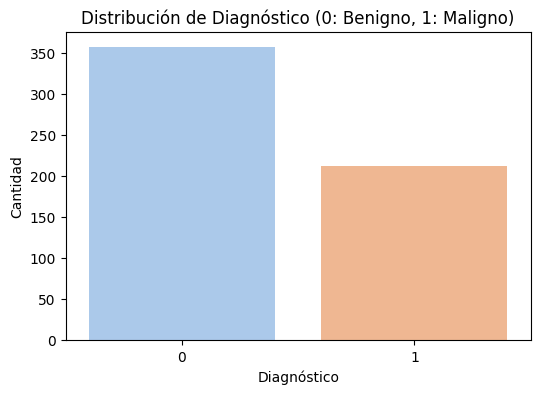

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualización de la distribución de las clases
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnostico', data=data, palette='pastel')
plt.title("Distribución de Diagnóstico (0: Benigno, 1: Maligno)")
plt.xlabel("Diagnóstico")
plt.ylabel("Cantidad")
plt.show()


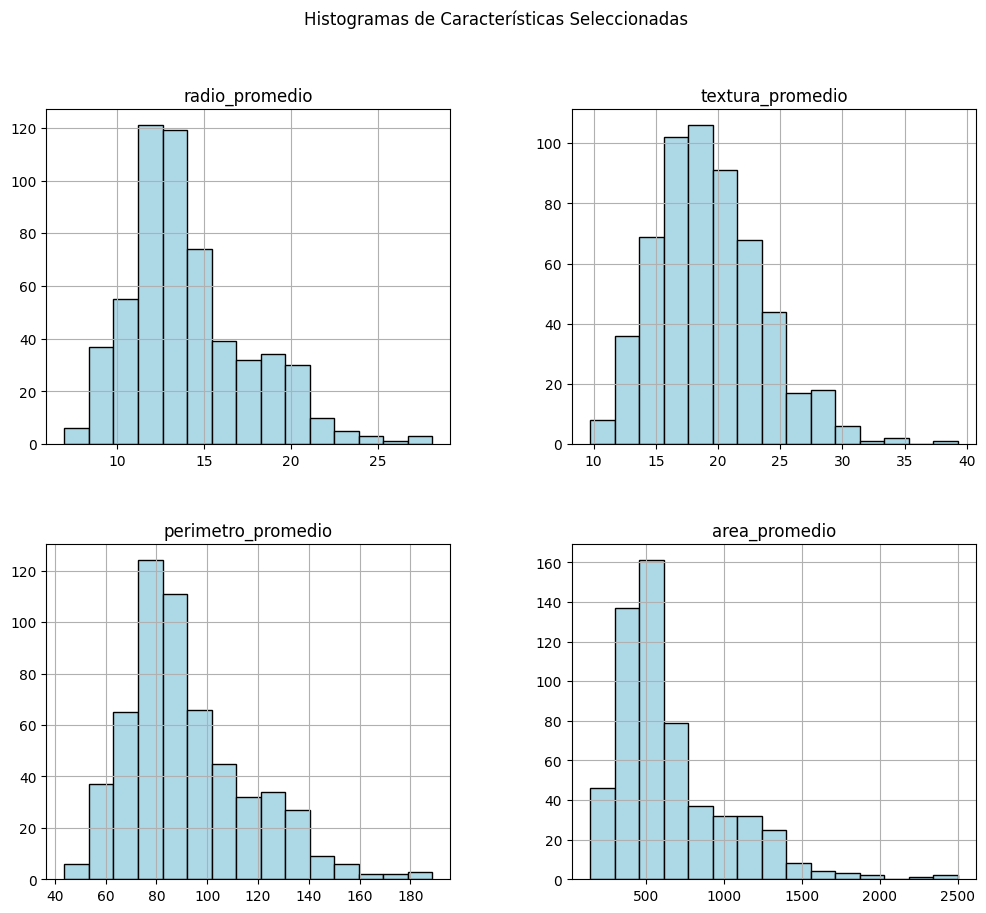

In [61]:
# Intentar nuevamente con los histogramas
features = ['radio_promedio', 'textura_promedio', 'perimetro_promedio', 'area_promedio']
data[features].hist(bins=15, figsize=(12, 10), layout=(2, 2), color='lightblue', edgecolor='black')
plt.suptitle("Histogramas de Características Seleccionadas")
plt.show()


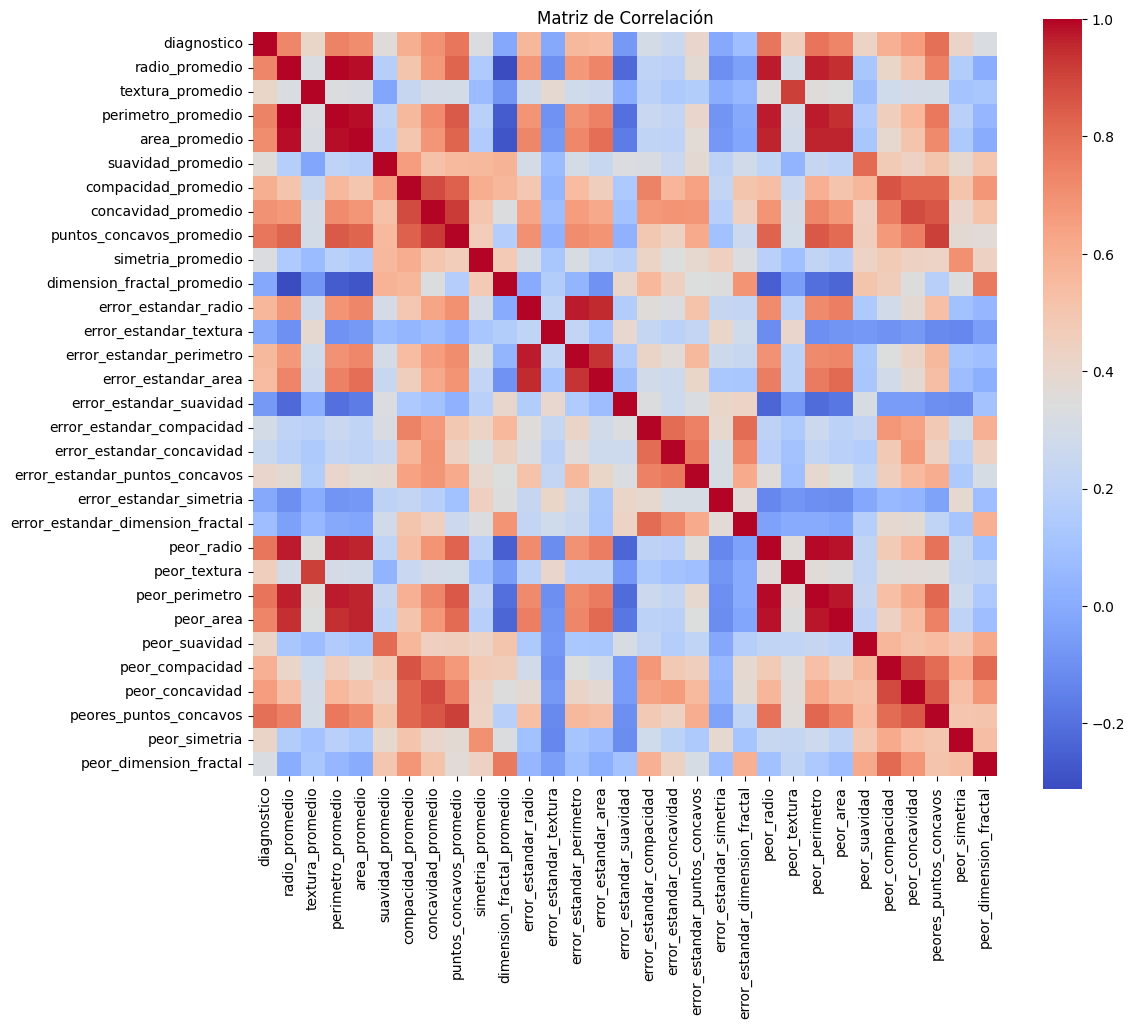

In [62]:
# Matriz de correlación
plt.figure(figsize=(12, 10))
correlation_matrix = data.iloc[:,:].corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', square=True, cbar=True, annot=False)
plt.title("Matriz de Correlación")
plt.show()


In [63]:
from sklearn.preprocessing import StandardScaler

# Crear una copia de los datos
ds = data.copy()

# Separar características y variable objetivo
X = ds.drop("diagnostico", axis=1)
y = ds["diagnostico"]

# Escalar las características
scaler = StandardScaler()
scaler.fit(X)
scaled_X = pd.DataFrame(scaler.transform(X), columns=X.columns)

print("Todas las características están estandarizadas.")


Todas las características están estandarizadas.


In [64]:
scaled_X.head()

,radio_promedio,textura_promedio,perimetro_promedio,area_promedio,suavidad_promedio,compacidad_promedio,concavidad_promedio,puntos_concavos_promedio,simetria_promedio,dimension_fractal_promedio,...,peor_radio,peor_textura,peor_perimetro,peor_area,peor_suavidad,peor_compacidad,peor_concavidad,peores_puntos_concavos,peor_simetria,peor_dimension_fractal
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [65]:
from sklearn.model_selection import train_test_split

# Dividir el dataset en entrenamiento (70%), validación (20%) y prueba (10%)
X_train, X_temp, y_train, y_temp = train_test_split(scaled_X, y, test_size=0.30, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, stratify=y_temp, random_state=42)

# Verificar las proporciones
train_percentage = len(y_train) / len(y) * 100
val_percentage = len(y_val) / len(y) * 100
test_percentage = len(y_test) / len(y) * 100

{
    "Entrenamiento (%)": train_percentage,
    "Validación (%)": val_percentage,
    "Prueba (%)": test_percentage,
}


{'Entrenamiento (%)': 69.94727592267135,
 'Validación (%)': 20.035149384885763,
 'Prueba (%)': 10.017574692442881}

C:\Users\samir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden_Layer_1 (Dense)          │ (None, 16)             │           496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_2 (Dense)          │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6406 - loss: 0.6725 - val_accuracy: 0.6228 - val_loss: 0.5685
Epoch 2/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6513 - loss: 0.5414 - val_accuracy: 0.6228 - val_loss: 0.4821
Epoch 3/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6319 - loss: 0.4772 - val_accuracy: 0.6316 - val_loss: 0.4208
Epoch 4/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6697 - loss: 0.3952 - val_accuracy: 0.6754 - val_loss: 0.3784
Epoch 5/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6934 - loss: 0.3991 - val_accuracy: 0.8158 - val_loss: 0.3469
Epoch 6/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8272 - loss: 0.3307 - val_accuracy: 0.8509 - val_loss: 0.3227
Epoch 7/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8851 - loss: 0.3225 - val_accuracy: 0.8772 - val_loss: 0.2989
Epoch 8/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9387 - loss: 0.2848 - val_accuracy: 0.9123 - 

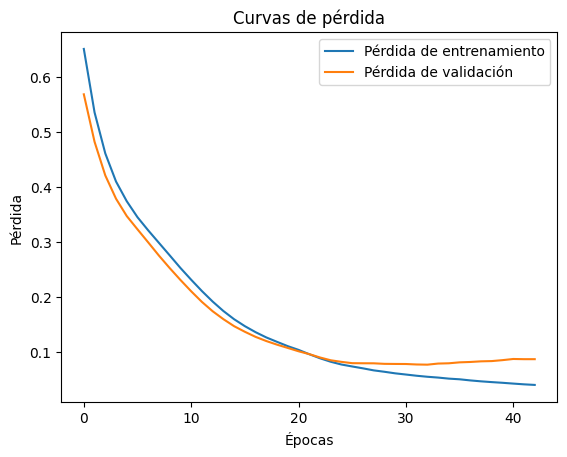

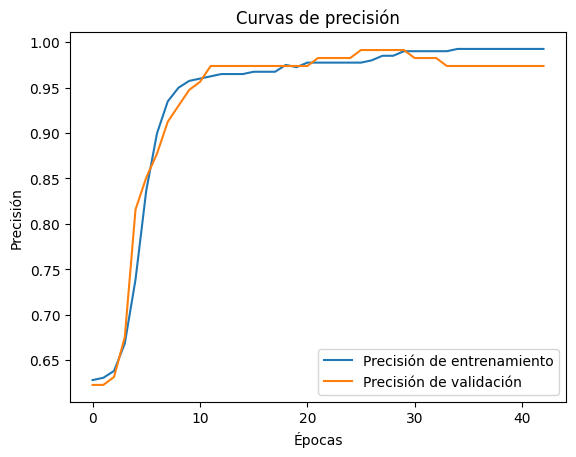

In [66]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
# Definir la arquitectura del modelo
model = Sequential([
    Dense(16, input_dim=X_train.shape[1], activation='relu', name='Hidden_Layer_1'),
    Dense(8, activation='relu', name='Hidden_Layer_2'),
    Dense(1, activation='sigmoid', name='Output_Layer')
])

# Compilar el modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo
model.summary()


early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitorea la pérdida en validación
    patience=10,         # Número de epochs sin mejora antes de detener
    restore_best_weights=True  # Restaurar el modelo con mejor desempeño
)

# Entrenar el modelo
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=500,  
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Precisión en el conjunto de prueba: {test_accuracy:.2f}")

# Gráficos de las curvas de aprendizaje


# Pérdida
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Curvas de pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Precisión
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Curvas de precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()


C:\Users\samir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden_Layer_1 (Dense)          │ (None, 16)             │           496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_2 (Dense)          │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6998 - loss: 0.6392 - val_accuracy: 0.7807 - val_loss: 0.5557
Epoch 2/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7958 - loss: 0.5411 - val_accuracy: 0.8246 - val_loss: 0.4839
Epoch 3/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8502 - loss: 0.4831 - val_accuracy: 0.8772 - val_loss: 0.4202
Epoch 4/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9049 - loss: 0.4145 - val_accuracy: 0.8947 - val_loss: 0.3604
Epoch 5/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9052 - loss: 0.3699 - val_accuracy: 0.9211 - val_loss: 0.3097
Epoch 6/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9260 - loss: 0.2987 - val_accuracy: 0.9386 - val_loss: 0.2639
Epoch 7/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9468 - loss: 0.2541 - val_accuracy: 0.9474 - val_loss: 0.2297
Epoch 8/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9345 - loss: 0.2394 - val_accuracy: 0

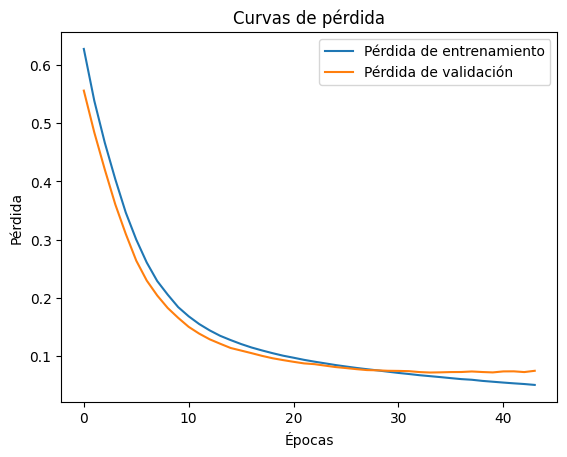

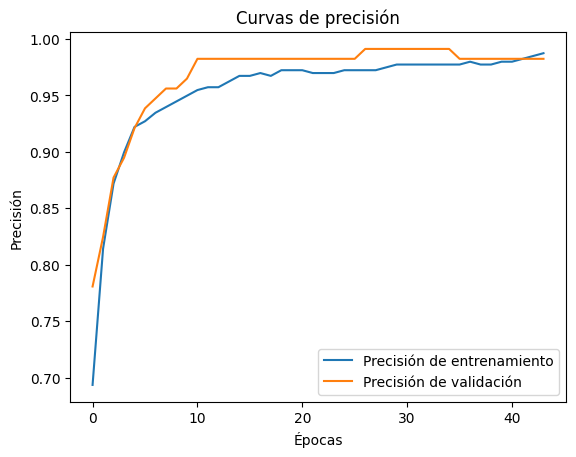

In [74]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
# Definir la arquitectura del modelo
model = Sequential([
    Dense(16, input_dim=X_train.shape[1], activation='relu', name='Hidden_Layer_1'),
    Dense(8, activation='relu', name='Hidden_Layer_2'),
    Dense(1, activation='sigmoid', name='Output_Layer')
])

# Compilar el modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo
model.summary()


early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitorea la pérdida en validación
    patience=10,         # Número de epochs sin mejora antes de detener
    restore_best_weights=True  # Restaurar el modelo con mejor desempeño
)

# Entrenar el modelo
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=1000,  
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Precisión en el conjunto de prueba: {test_accuracy:.2f}")

# Gráficos de las curvas de aprendizaje


# Pérdida
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Curvas de pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Precisión
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Curvas de precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()


C:\Users\samir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden_Layer_1 (Dense)          │ (None, 16)             │           496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_2 (Dense)          │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4254 - loss: 0.7103 - val_accuracy: 0.8421 - val_loss: 0.4969
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8791 - loss: 0.4540 - val_accuracy: 0.9298 - val_loss: 0.3236
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9749 - loss: 0.2712 - val_accuracy: 0.9649 - val_loss: 0.2014
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9653 - loss: 0.1685 - val_accuracy: 0.9649 - val_loss: 0.1417
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9699 - loss: 0.1310 - val_accuracy: 0.9737 - val_loss: 0.1129
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9853 - loss: 0.0798 - val_accuracy: 0.9649 - val_loss: 0.0971
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9904 - loss: 0.0762 - val_accuracy: 0.9649 - val_loss: 0.0877
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9889 - loss: 0.0640 - val_accuracy: 0.9737 - val_loss:

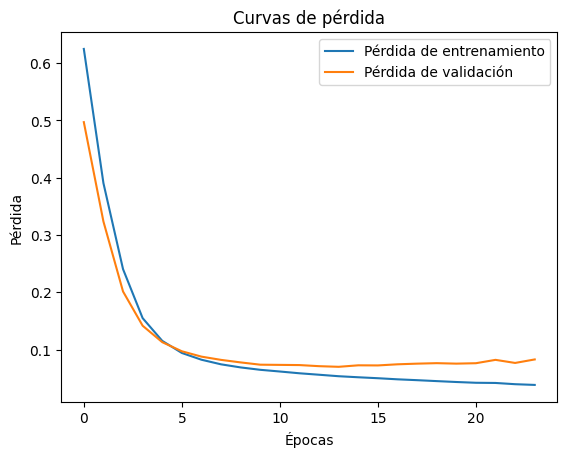

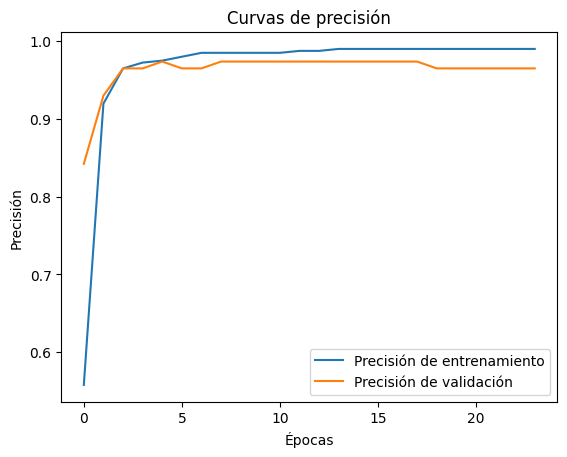

In [75]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
# Definir la arquitectura del modelo
model = Sequential([
    Dense(16, input_dim=X_train.shape[1], activation='relu', name='Hidden_Layer_1'),
    Dense(8, activation='relu', name='Hidden_Layer_2'),
    Dense(1, activation='sigmoid', name='Output_Layer')
])

# Compilar el modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo
model.summary()


early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitorea la pérdida en validación
    patience=10,         # Número de epochs sin mejora antes de detener
    restore_best_weights=True  # Restaurar el modelo con mejor desempeño
)

# Entrenar el modelo
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,  
    batch_size=8,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Precisión en el conjunto de prueba: {test_accuracy:.2f}")

# Gráficos de las curvas de aprendizaje


# Pérdida
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Curvas de pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Precisión
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Curvas de precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()


In [76]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Precisión en el conjunto de prueba: {test_accuracy:.2f}")


Precisión en el conjunto de prueba: 1.00
